# Import Libraries

In [57]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import dataset

In [4]:
data = pd.read_csv('./Dataset/shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Data Dictionary

> - **Customer ID**: Unique identifier for each customer.
> - **Age**: Age of the customer.
> - **Gender**: Gender of the customer (Male/Female).
> - **Item Purchased**: The item purchased by the customer.
> - **Category**: Category of the item purchased.
> - **Purchase Amount (USD)**: The amount of the purchase in USD.
> - **Location**: Location where the purchase was made.
> - **Size**: Size of the purchased item.
> - **Color**: Color of the purchased item.
> - **Season**: Season during which the purchase was made.
> - **Review Rating**: Rating given by the customer for the purchased item.
> - **Subscription Status**: Indicates if the customer has a subscription (Yes/No).
> - **Shipping Type**: Type of shipping chosen by the customer.
> - **Discount Applied**: Indicates if a discount was applied to the purchase (Yes/No).
> - **Promo Code Used**: Indicates if a promo code was used for the purchase (Yes/No).
> - **Previous Purchases**: Number of previous purchases made by the customer.
> - **Payment Method**: Customer's most preferred payment method.
> - **Frequency of Purchases**: Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

### Check the Shape of the Dataset

In [15]:
print("The shape of this dataset:")
print(data.shape)

The shape of this dataset:
(3900, 18)


### Information about the Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Data Cleaning

### Check Null Values

In [13]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


### Check the Duplicate Values

In [14]:
print("Duplicate values:")
print(data.duplicated().sum())

Duplicate values:
0


### Reshape / Resize the data

In [20]:
# Check for Consistent and Correct Labels
print("Unique values for categorical columns:")
for col in data.select_dtypes(include=['object', 'category']):
    print(f"{col}: {data[col].unique()}")

Unique values for categorical columns:
Gender: ['Male' 'Female']
Item Purchased: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Location: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']
Size: ['L' 'S' 'M' 'XL']
Color: ['Gray' 

Based on our analysis, our dataset **doesn't need reshape/resize** becuase of the following reasons:
- No Missing values
- No Duplicate values
- Consistent Data Types (By using `data.describe()` above)
- Consistent and Correct Labels

## Data Visualization

### Numerical Data Analysis

In [32]:
#Extract and visualize numeric data
inttype = ["Purchase Amount (USD)","Previous Purchases"]
variable_int = data[inttype]
variable_int.head()

,Purchase Amount (USD),Previous Purchases
0,53,14
1,64,2
2,73,23
3,90,49
4,49,31


In [33]:
variable_int.describe()

,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000
mean,59.764359,25.351538
std,23.685392,14.447125
min,20.000000,1.000000
25%,39.000000,13.000000
50%,60.000000,25.000000
75%,81.000000,38.000000
max,100.000000,50.000000


In [31]:
review_rate = data["Review Rating"]
review_rate.describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

#### Uni-variate Analysis

<Axes: >

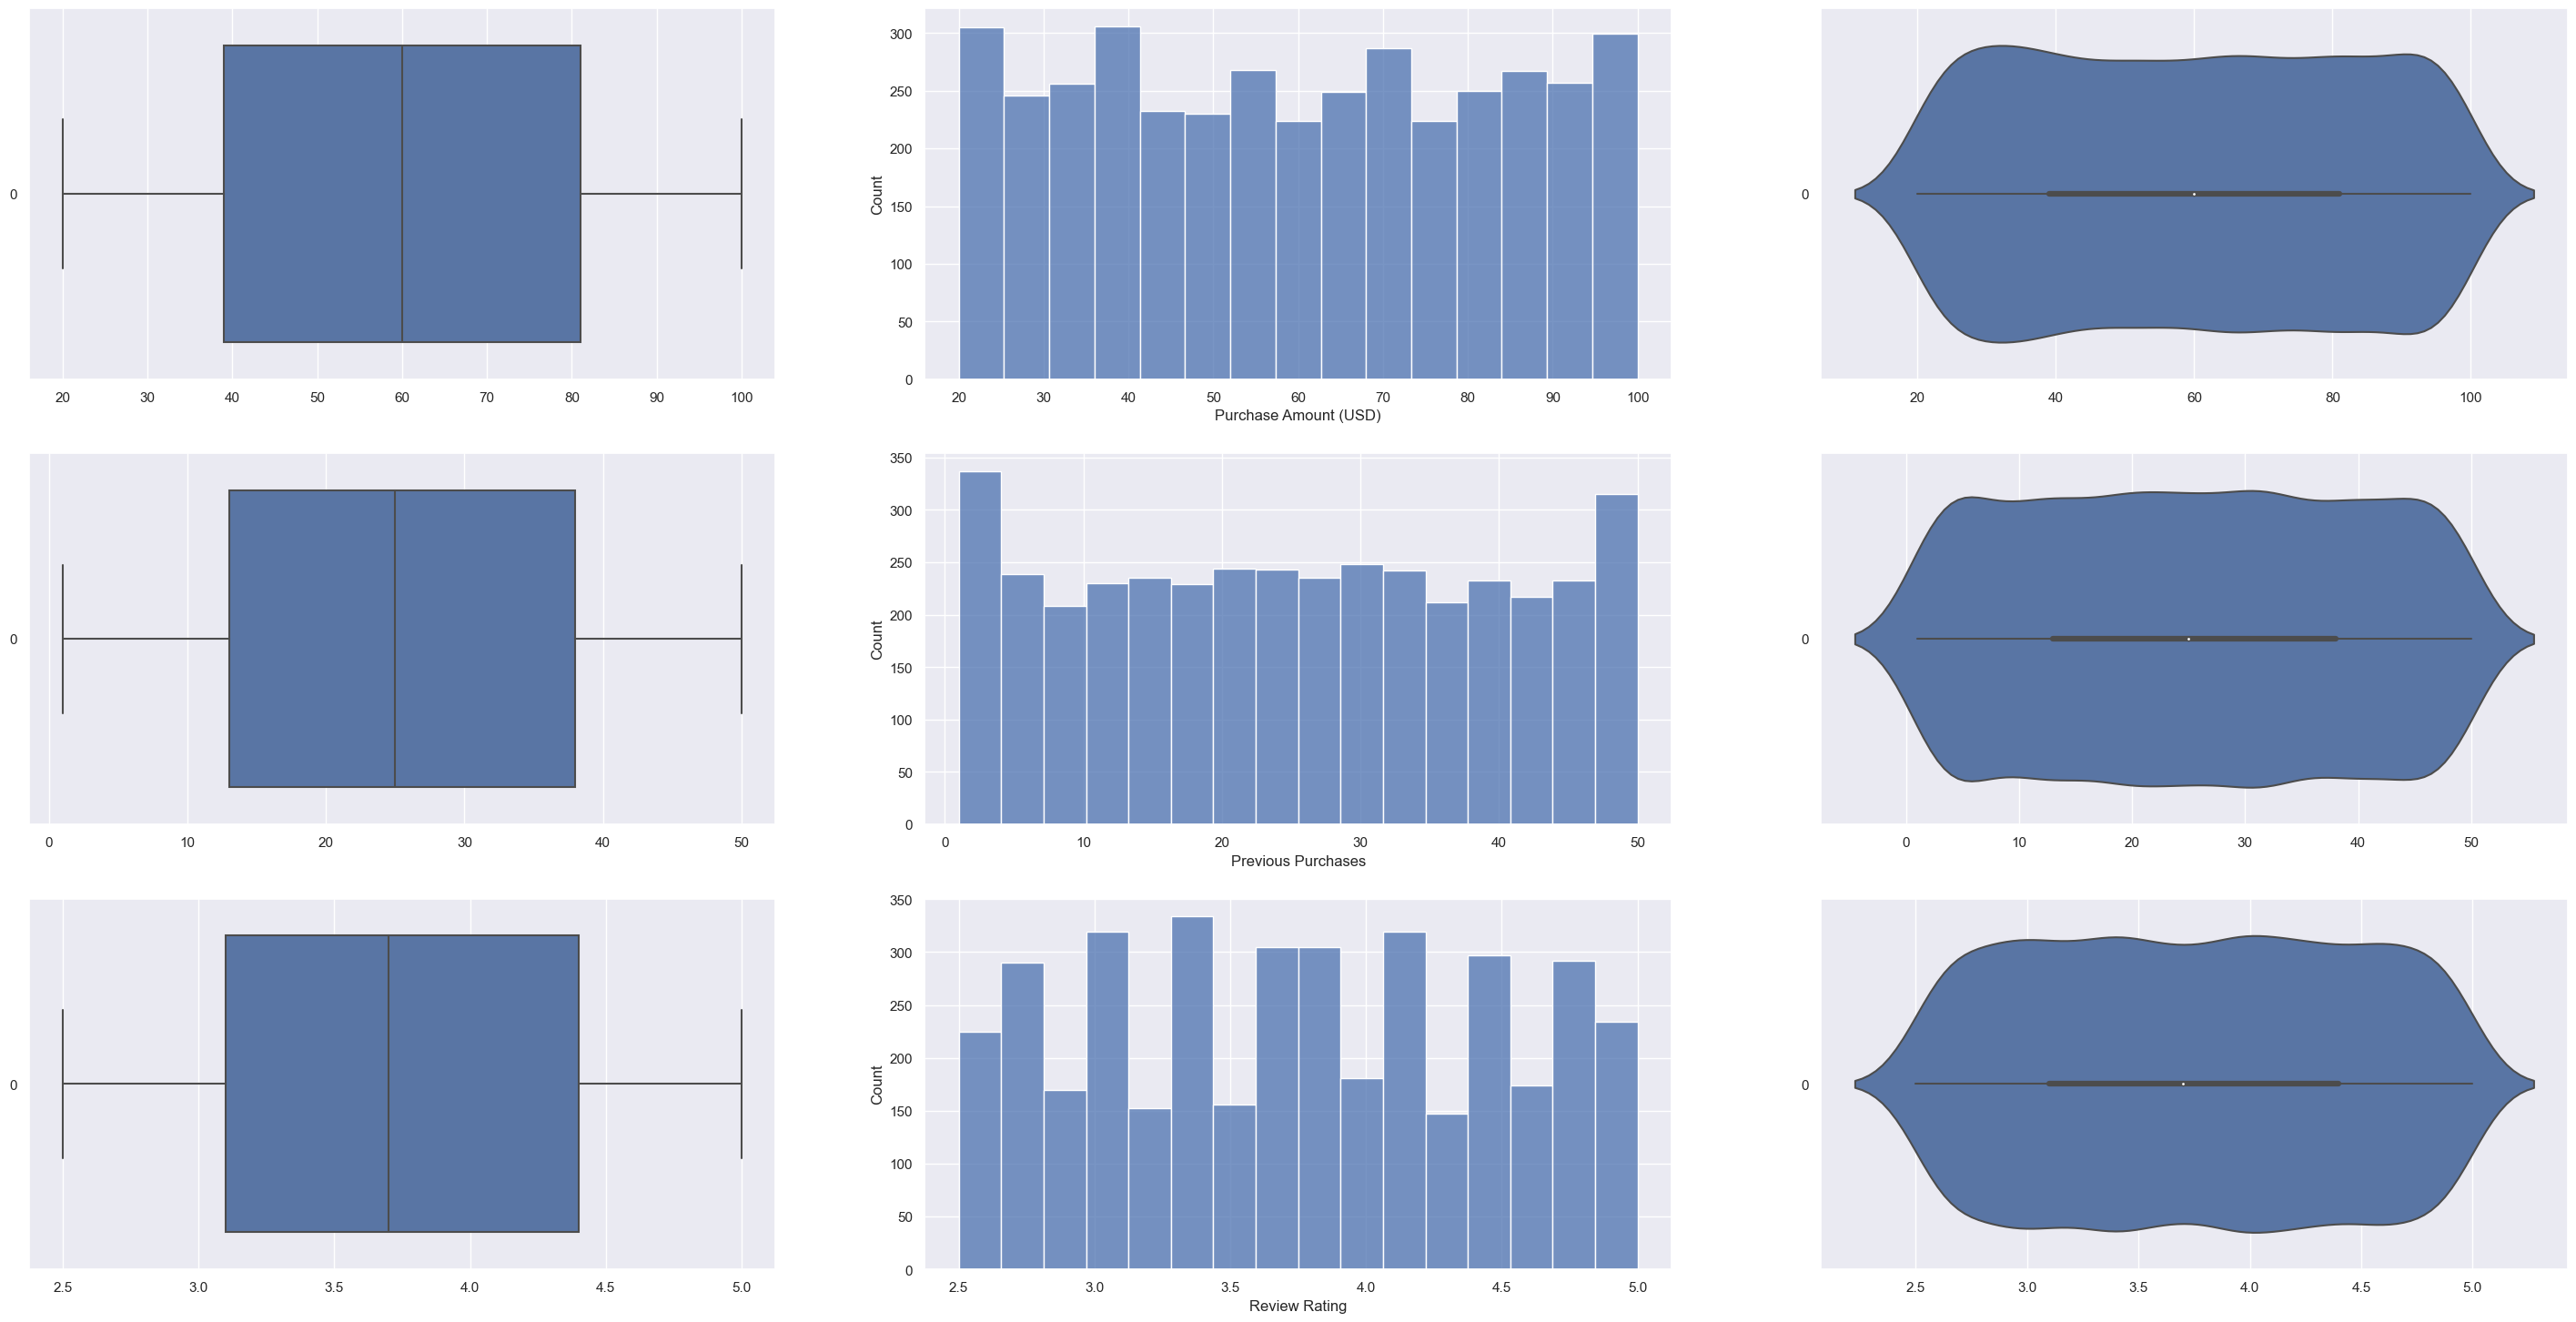

In [34]:
Purchase_Amount = variable_int["Purchase Amount (USD)"]
Previous_Purchases = variable_int["Previous Purchases"]

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(36, 18))

# Plot the basic uni-variate figures for Purchase Amount
sb.boxplot(data = Purchase_Amount, orient = "h", ax = axes[0,0])
sb.histplot(data = Purchase_Amount, ax = axes[0,1])
sb.violinplot(data = Purchase_Amount, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Previous Purchases
sb.boxplot(data = Previous_Purchases, orient = "h", ax = axes[1,0])
sb.histplot(data = Previous_Purchases, ax = axes[1,1])
sb.violinplot(data = Previous_Purchases, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Review Rate
sb.boxplot(data = review_rate, orient = "h", ax = axes[2,0])
sb.histplot(data = review_rate, ax = axes[2,1])
sb.violinplot(data = review_rate, orient = "h", ax = axes[2,2])

From the boxplots above, we can safely say that there is no outlier in our dataset.

#### Multi-variate Analysis

In [53]:
jointDF = pd.concat([review_rate,Purchase_Amount, Previous_Purchases], axis = 1).reindex(review_rate)
jointDF.corr()

,Review Rating,Purchase Amount (USD),Previous Purchases
Review Rating,1.000000,0.832945,0.779002
Purchase Amount (USD),0.832945,1.000000,0.995832
Previous Purchases,0.779002,0.995832,1.000000


<Axes: >

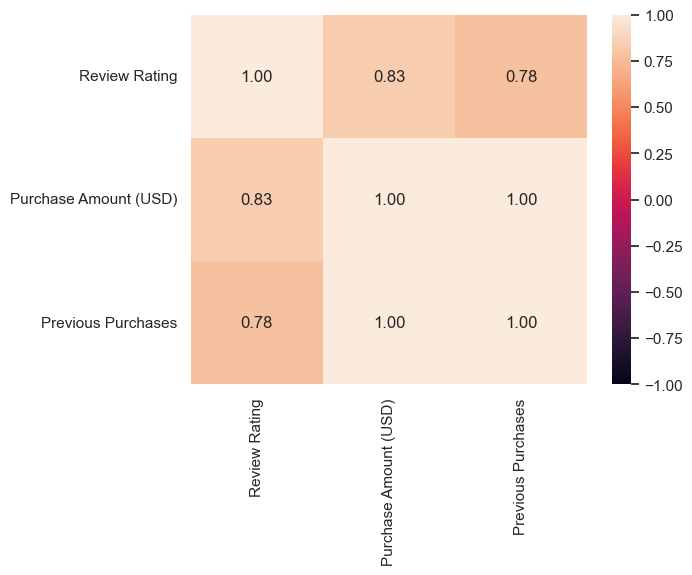

In [25]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From the heatmap, we get the following insightful information:
- **Review Rating** has:
    - Strong positive correlation (0.83) with **Purchase Amount (USD)**
    - Moderate positive correlation (0.78) with **Previous Purchases**


- **Purchase Amount (USD**) has:
    - Perfect positive correlation (1.00) with **Previous Purchases**
    - Strong positive correlation (0.83) with **Review Rating**


- **Previous Purchases** has:
    - Perfect positive correlation (1.00) with **Purchase Amount (USD)**
    - Moderate positive correlation (0.78) with Review Rating

### Categorical Data Analysis

In [42]:
#Extract and visualize objective data
objective_data_with_items = data[['Age', 'Previous Purchases', 'Color', 'Season', 'Item Purchased','Gender','Location']]
data_obj = []
data_obj.append("Age")
for each in data:
    if data[each].dtype == "object":
        data_obj.append(each)

### Extract and visulize the count of item purchased against different variables

#### 1. Item Purchased againes seasons

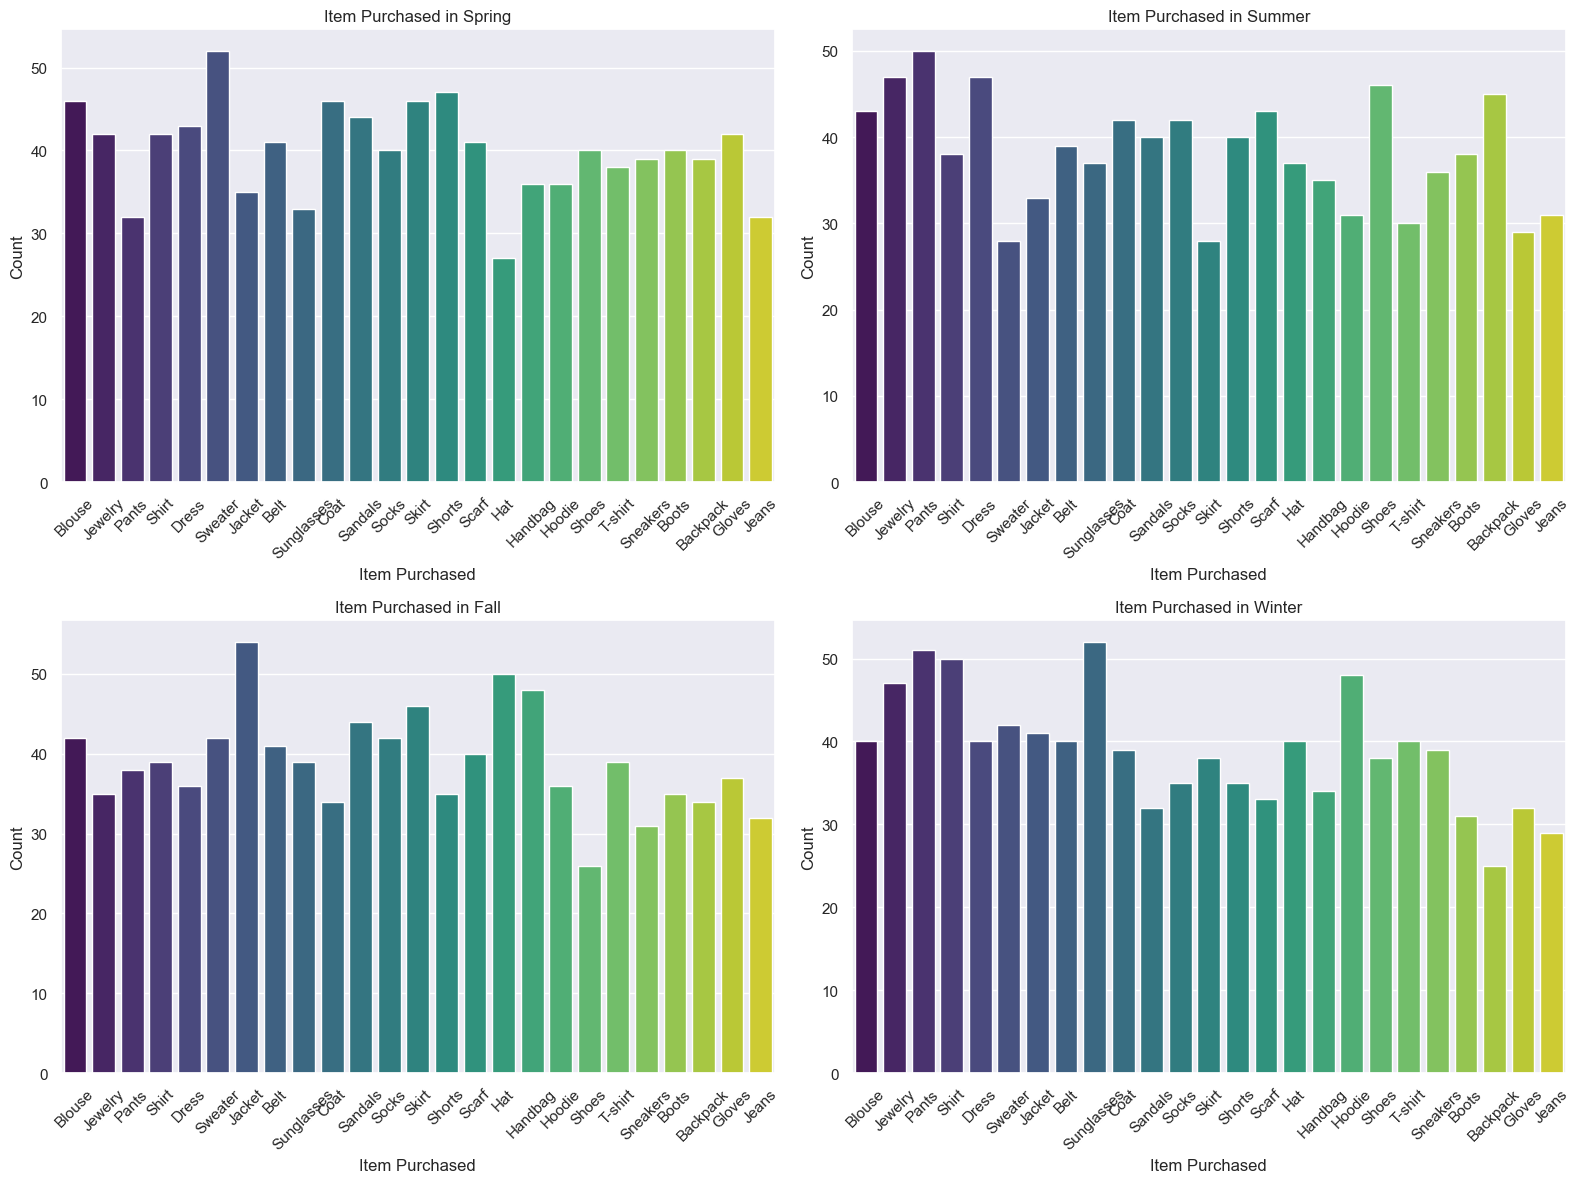

In [43]:
# Define the order for seasons and item purchased
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

item_purchased_order = objective_data_with_items['Item Purchased'].value_counts().index

plt.figure(figsize=(16, 12))

# Creating a subplot for each season
for i, season in enumerate(season_order, 1):
    plt.subplot(2, 2, i)
    season_data = objective_data_with_items[objective_data_with_items['Season'] == season]
    sb.countplot(data=season_data, x='Item Purchased', order=item_purchased_order, palette='viridis')
    plt.title(f'Item Purchased in {season}')
    plt.xlabel('Item Purchased')
    plt.ylabel('Count')
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

From the four graphs above, we can see when season change, customers' preference will be different. But overally speaking, the purchase patterns seem to **align with seasonal needs and activities**, with higher counts for season-appropriate items and lower counts for items more relevant to other seasons.
For example:
- In Spring:
    - **Higher** purchase counts for items like **"Rain Hat"**, **"Umbrella"**, and **"Gardening Tools"**
    - **Lower** counts for winter-related items like **"Snowboard"**, **"Jacket"**, and **"Gloves"**
- In Summer:
    - **Higher** purchase counts for items like **"Sunglasses"**, **"Swimwear"**, and **"Beach Gear"**
    - **Lower** counts for cold-weather items like **"Scarf"**, **"Boots"**, and **"Heating System"**

- In Fall:
    - **Higher** purchases of items like **"Rake"**, **"Sweater"**, and **"Boots"**
    - **Lower** counts for summer-related items like **"Swimwear"** and **"Beach Gear"**

- In Winter:
    - **Higher** purchase counts for winter-specific items like **Snowboard"**, **"Jacket"**, **"Gloves"**, and **"Heating System"**
    - **Lower** counts for summer and spring items like **"Gardening Tools"**, **"Sunglasses"**, and **"Umbrella"**

#### 2. Items purchased against Gender

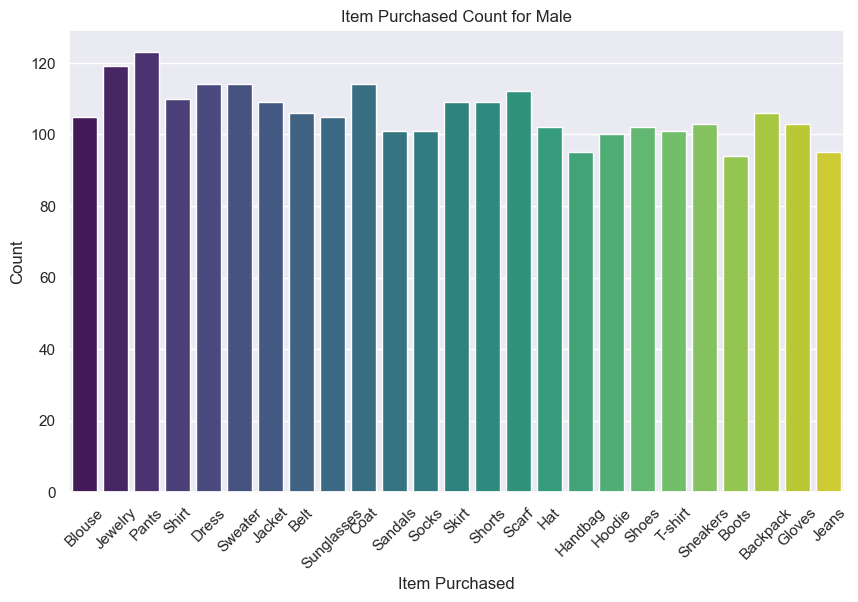

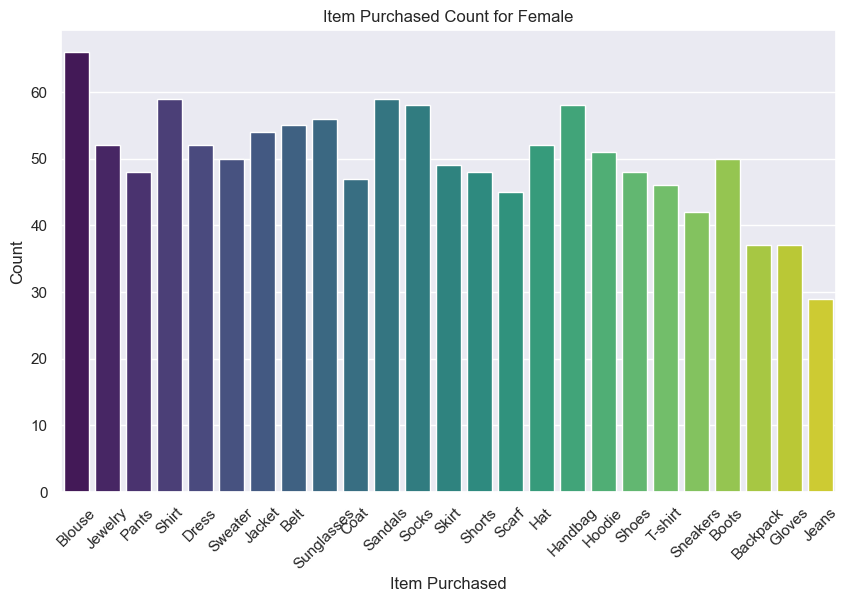

In [44]:
# Determine the order of items purchased
item_purchased_order = objective_data_with_items['Item Purchased'].value_counts().index

# Create separate figures for each gender
genders = ['Male', 'Female']

for gender in genders:
    gender_data = objective_data_with_items[objective_data_with_items['Gender'] == gender]
    
    # Set up the figure
    plt.figure(figsize=(10, 6))
    sb.countplot(data=gender_data, x='Item Purchased', order=item_purchased_order, palette='viridis')
    plt.title(f'Item Purchased Count for {gender}')
    plt.xlabel('Item Purchased')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

From the graph above, we can clearly see that:
- **Males** generally make **more purchases** across most items compared to females.
- The **gender difference** in purchase counts varies across different items.

#### 3. Item purchased against Location

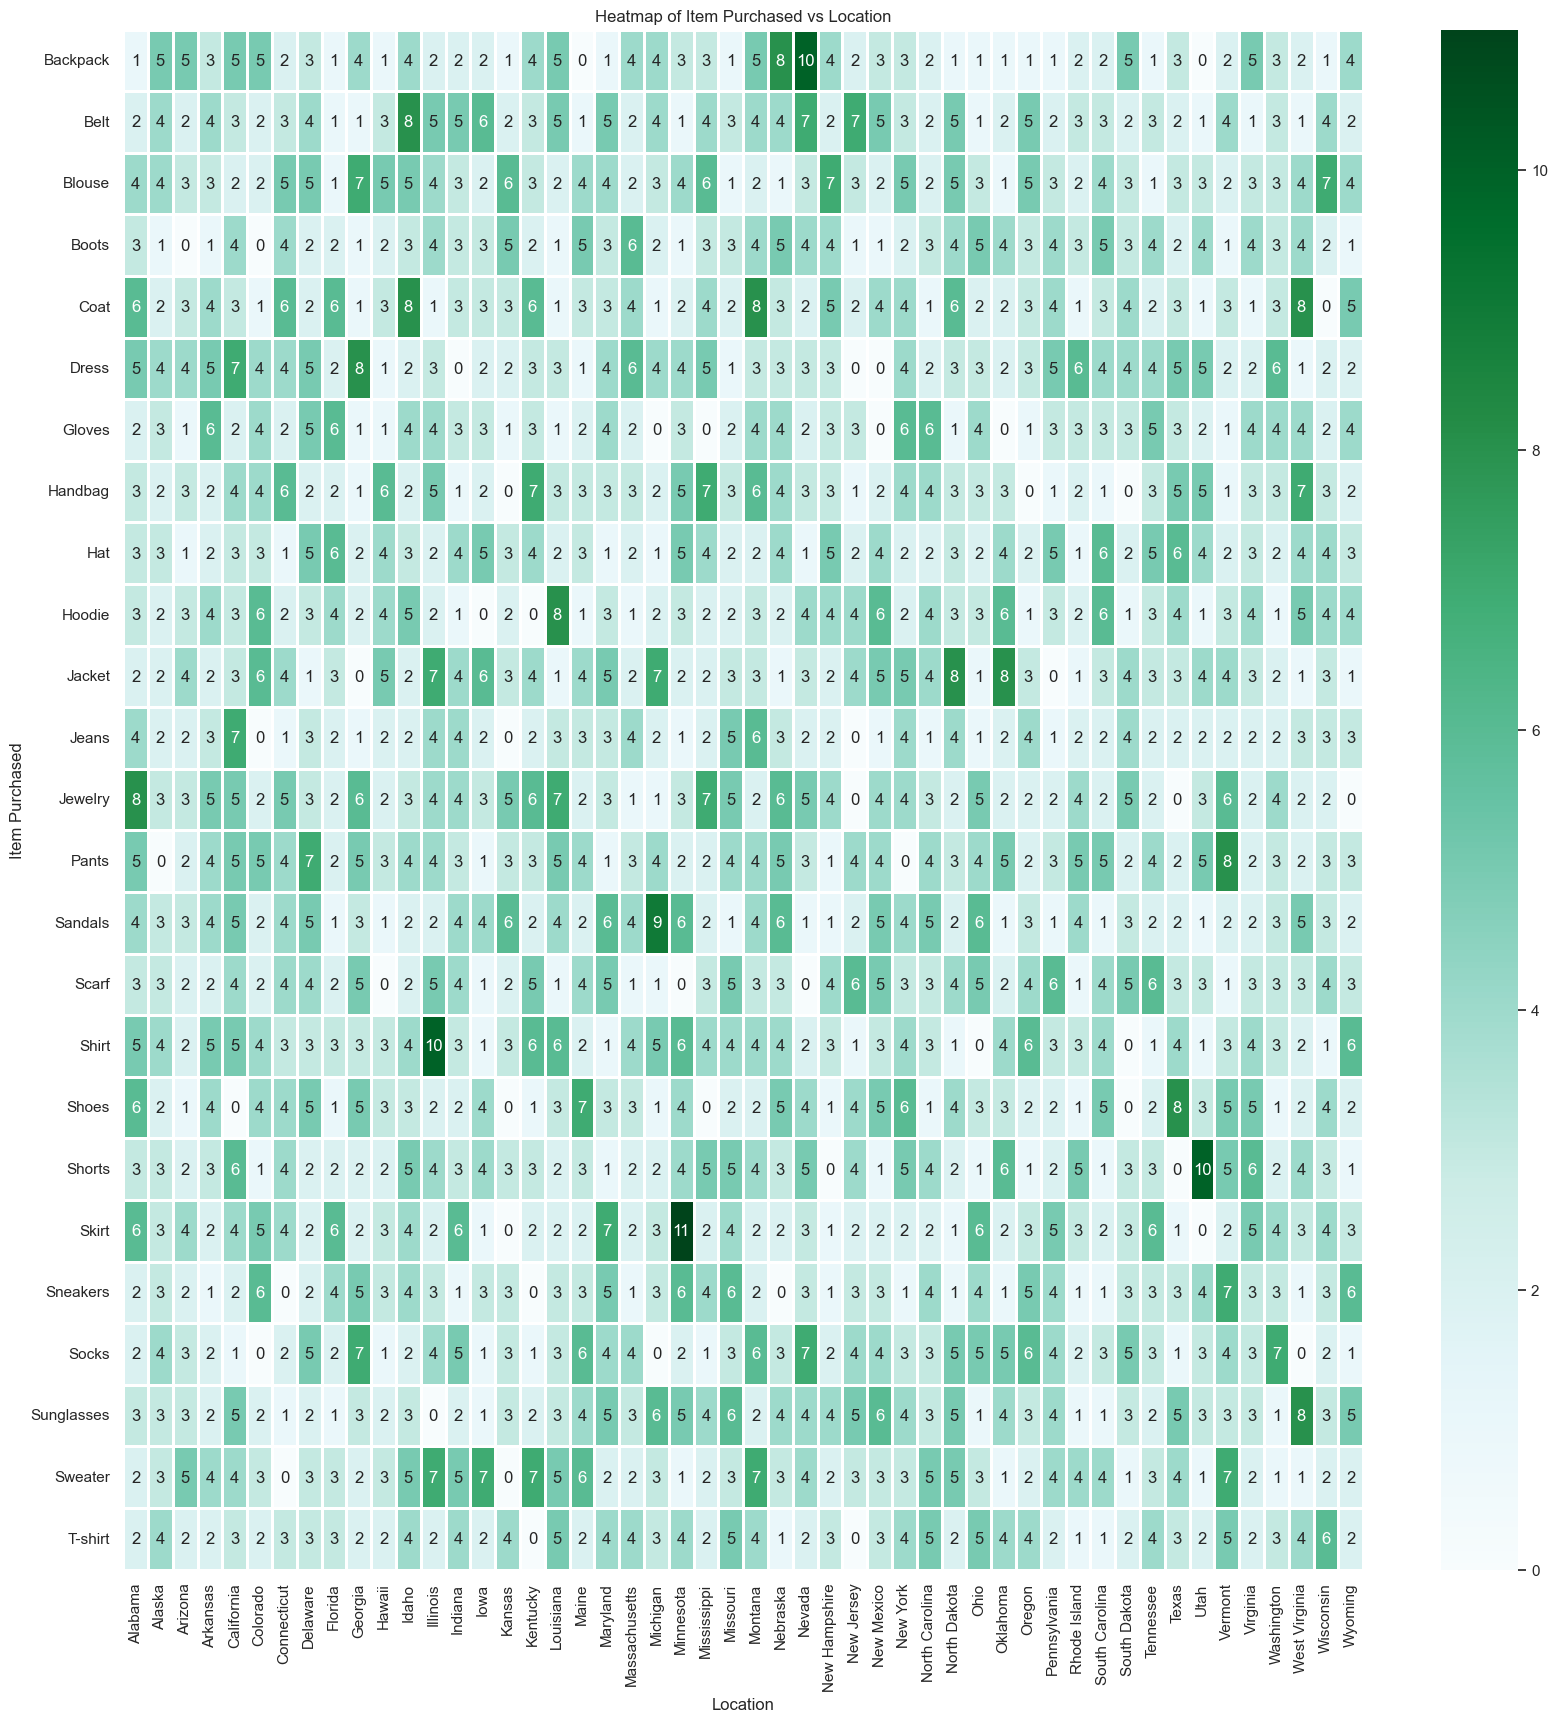

In [45]:
pivot_table = objective_data_with_items.pivot_table(index='Item Purchased', columns='Location', aggfunc='size', fill_value=0)

# Set up the figure size for the heatmap
plt.figure(figsize=(20, 20))

# Create the heatmap
sb.heatmap(pivot_table, linewidths = 1, annot = True, annot_kws = {"size": 12}, cmap = "BuGn")
plt.title('Heatmap of Item Purchased vs Location')
plt.xlabel('Location')
plt.ylabel('Item Purchased')
plt.show()

In this part, we tried using the heatmap to analyse item purchased against location because it allows for a quick and intuitive understanding of the distribution of purchases across different items and locations by showing the frequency or count of each item purchased in each location.

For example, from 

#### 4. Item purchased count against Age

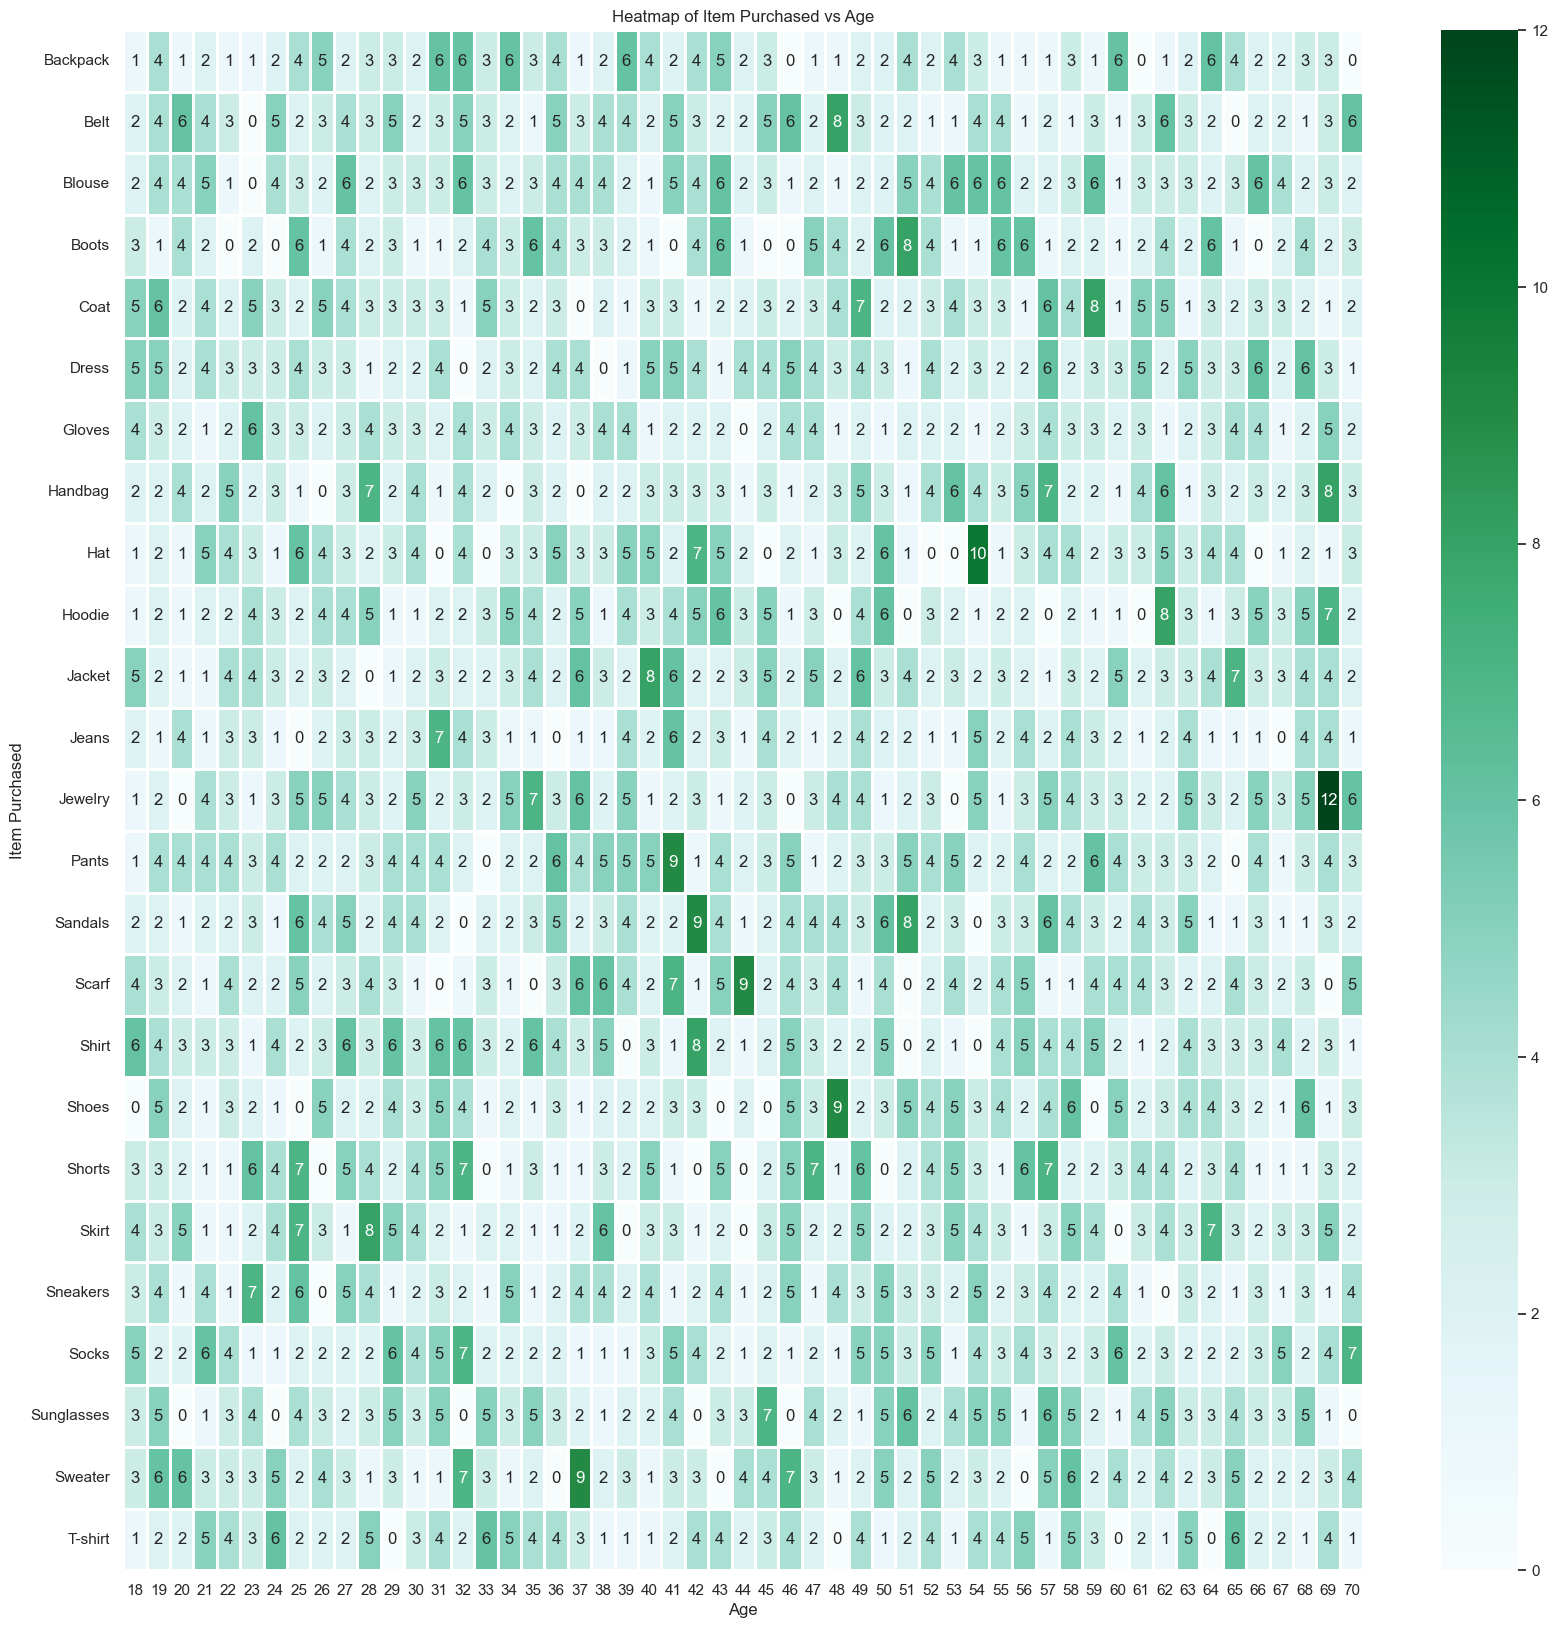

In [47]:
pivot_table = objective_data_with_items.pivot_table(index='Item Purchased', columns='Age', aggfunc='size', fill_value=0)

# Set up the figure size for the heatmap
plt.figure(figsize=(20, 20))

# Create the heatmap
sb.heatmap(pivot_table, linewidths = 1, annot = True, annot_kws = {"size": 12}, cmap = "BuGn")
plt.title('Heatmap of Item Purchased vs Age')
plt.xlabel('Age')
plt.ylabel('Item Purchased')
plt.show()

## Extract and visulize the review rate of item purchased against different variables

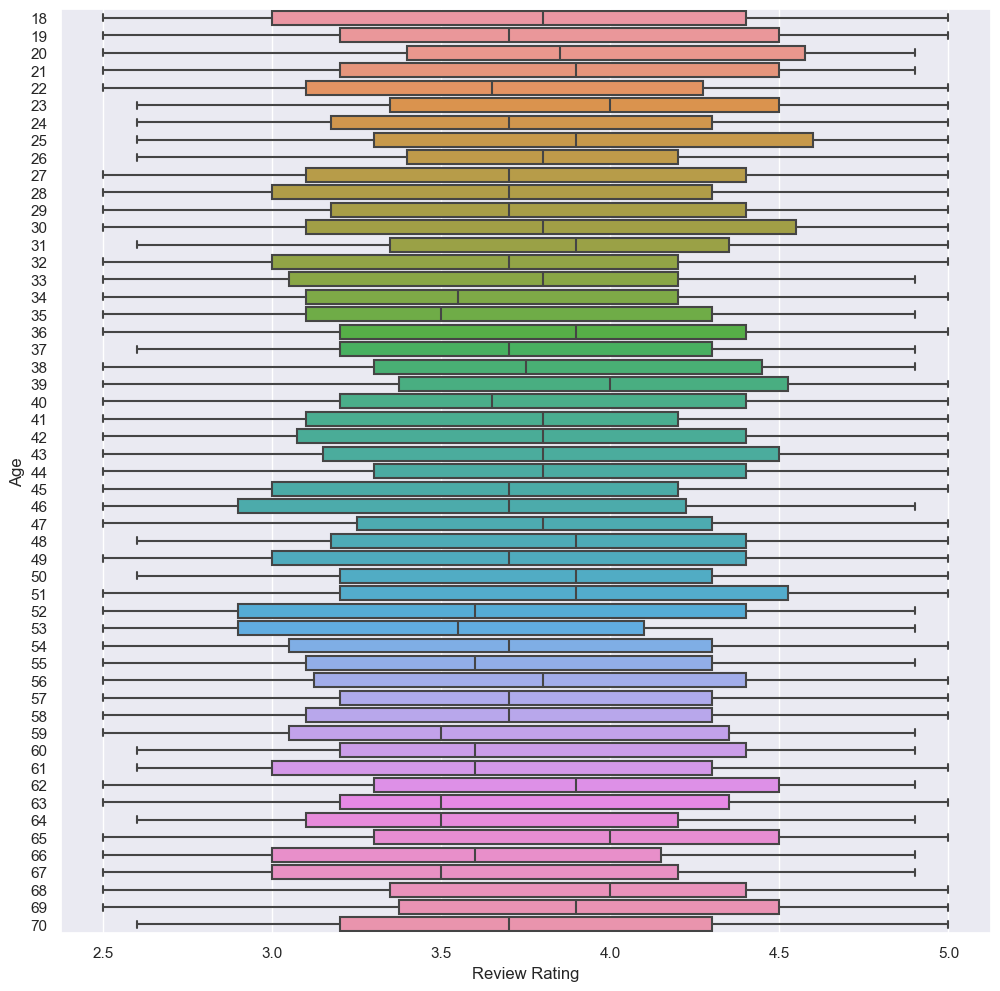

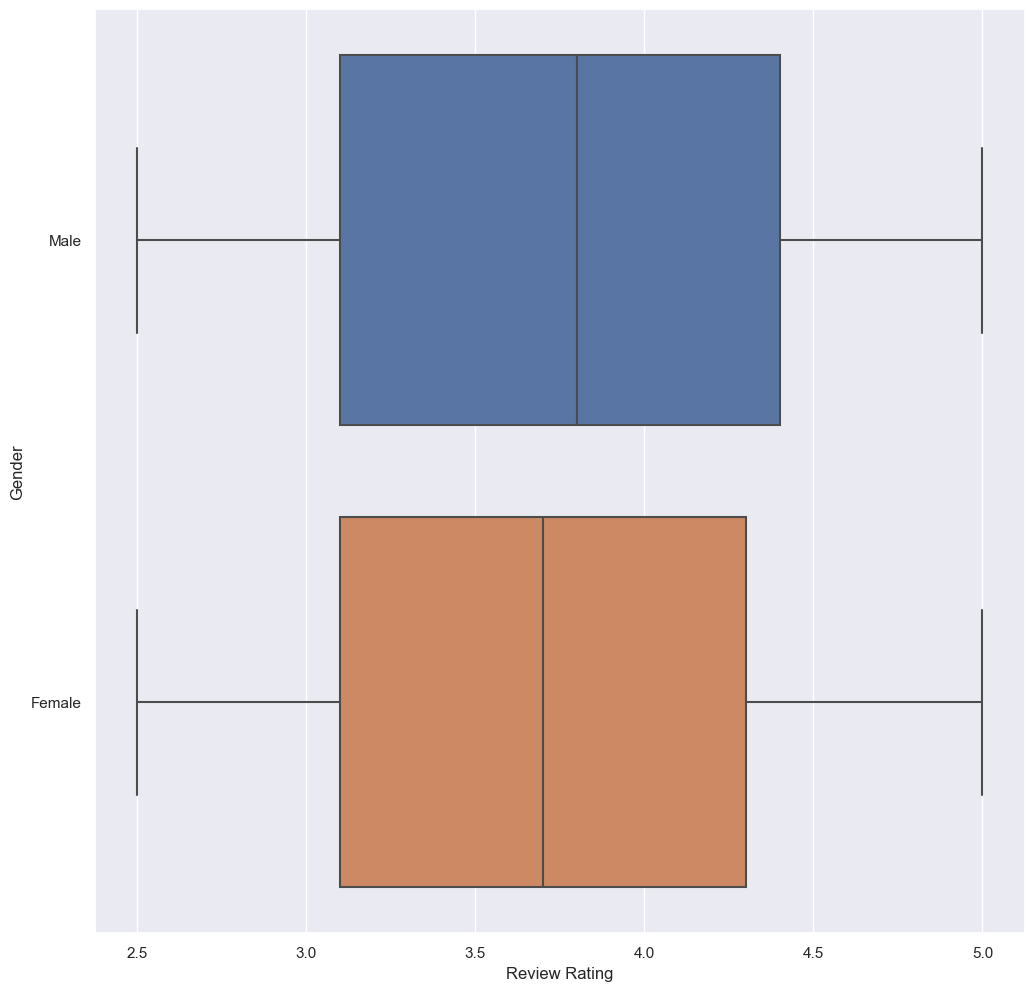

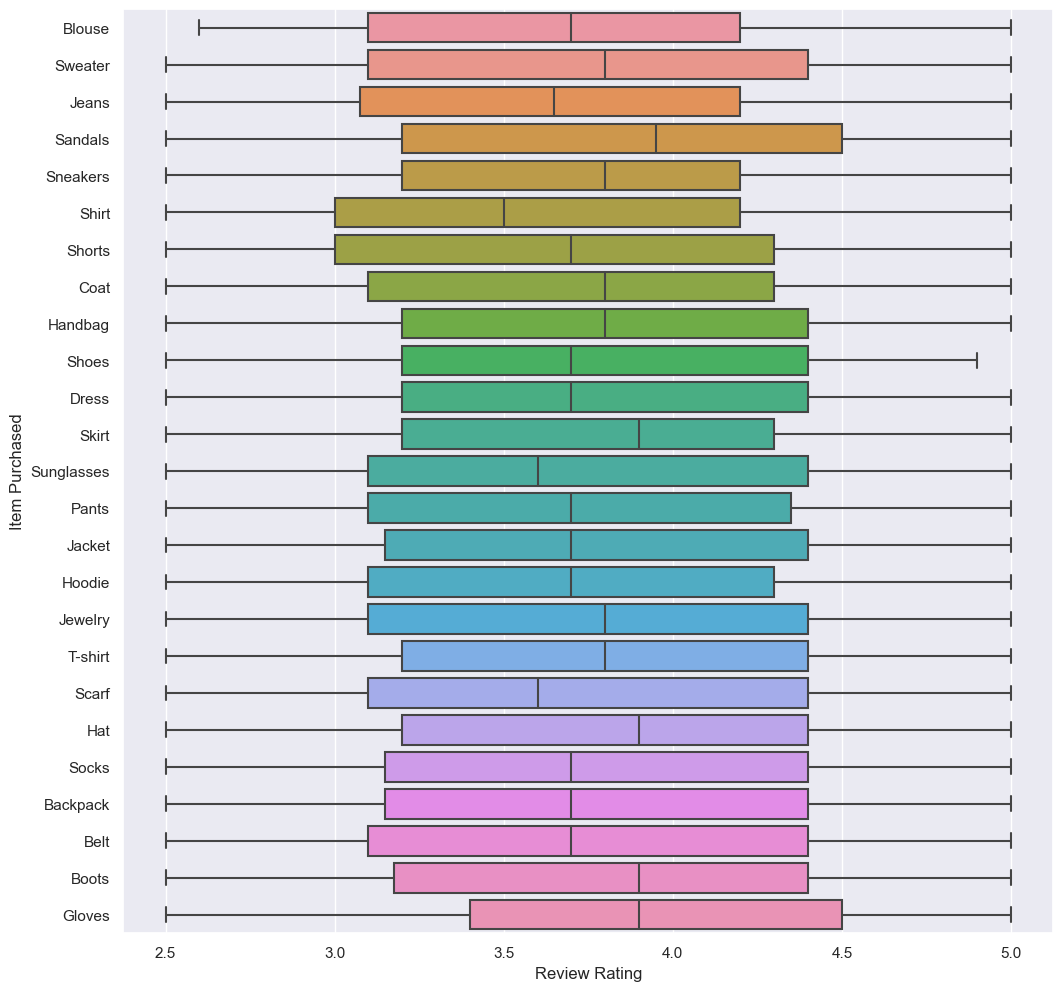

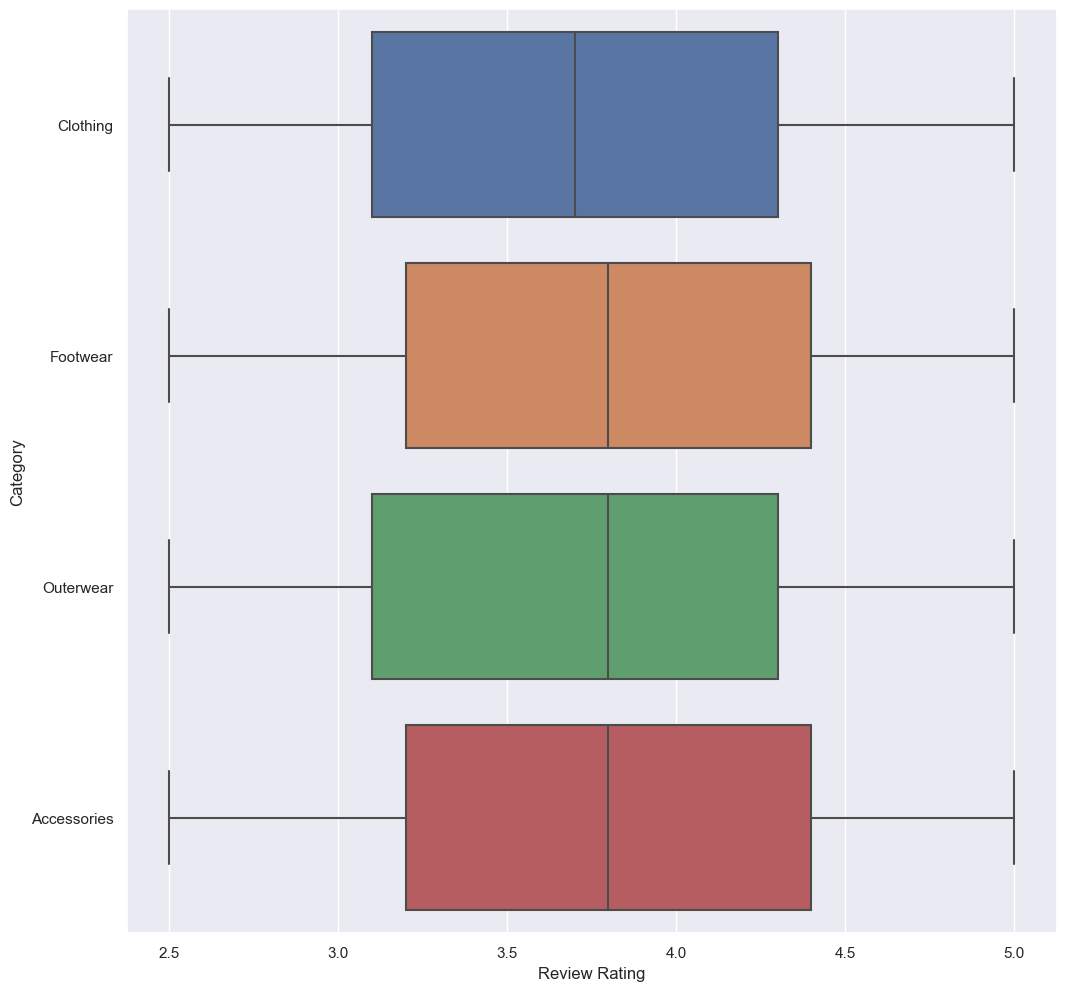

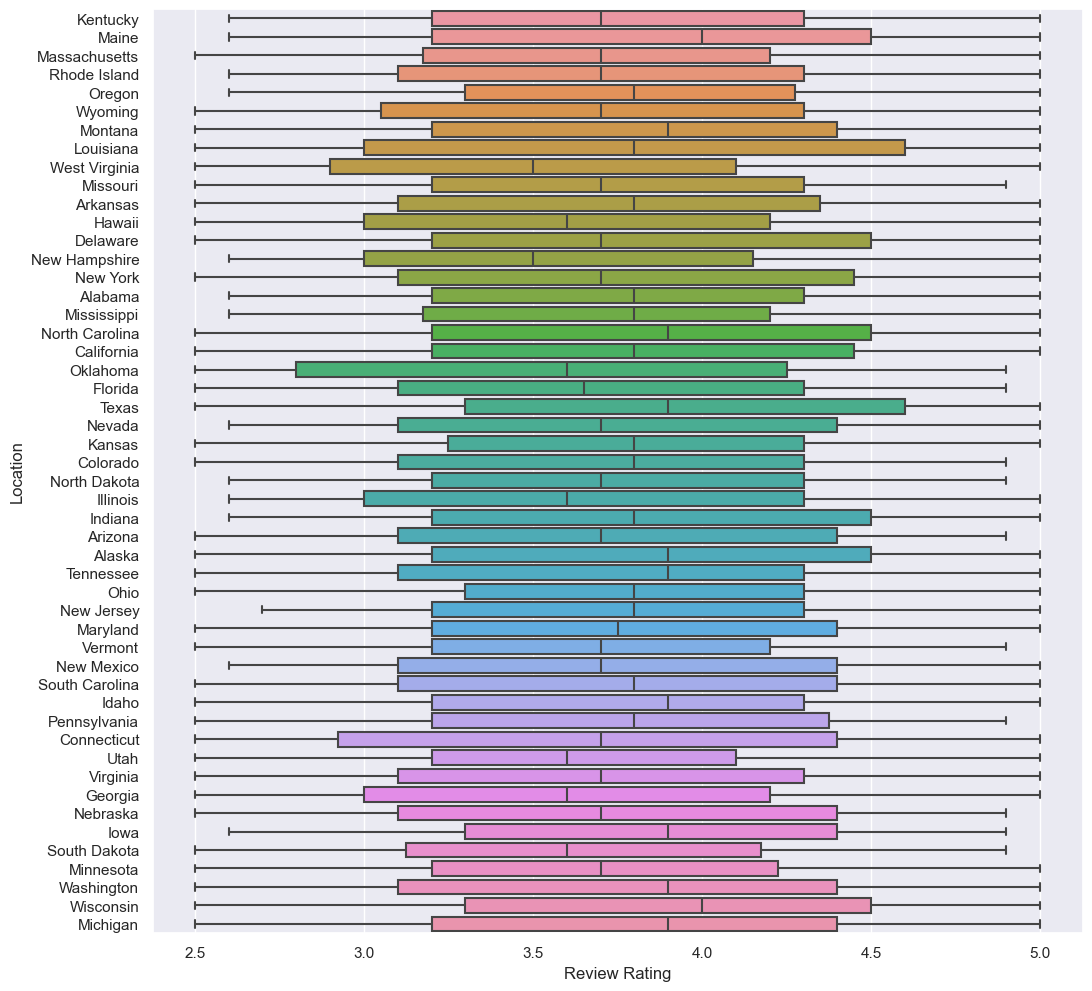

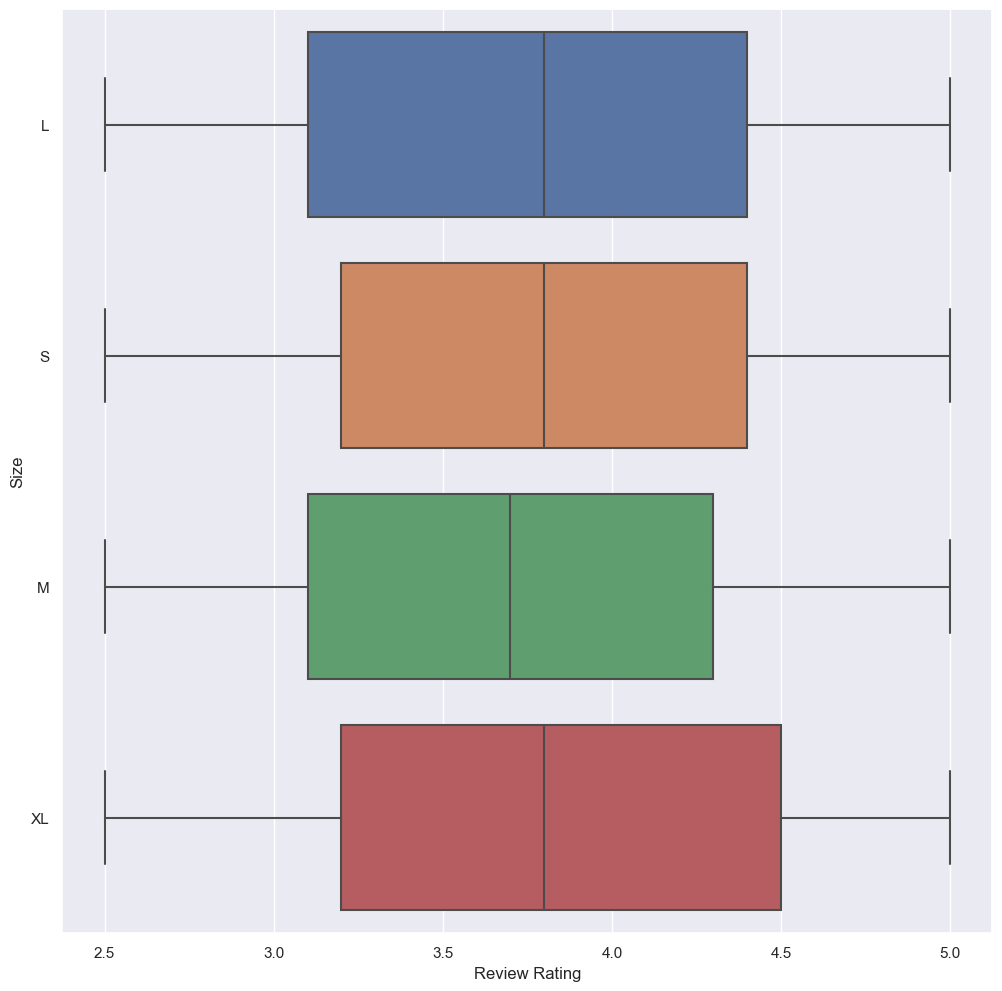

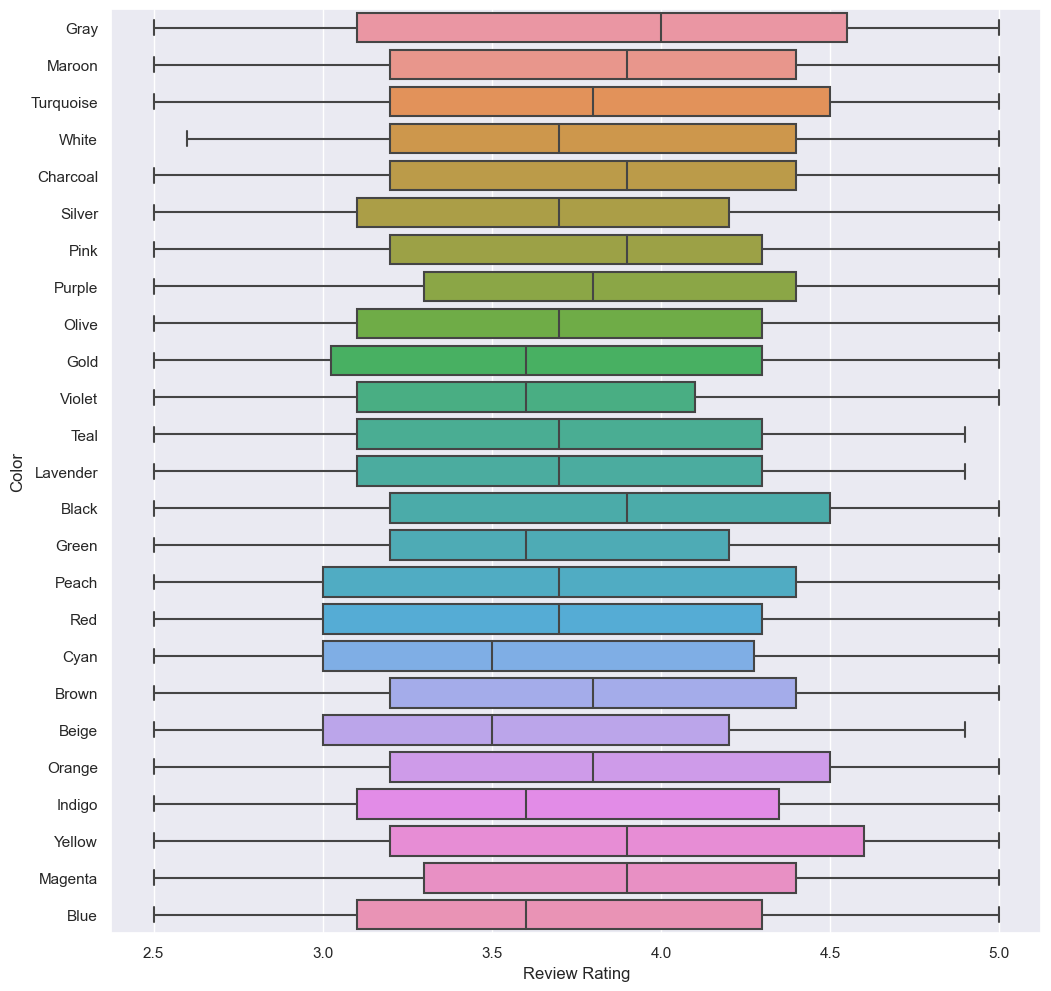

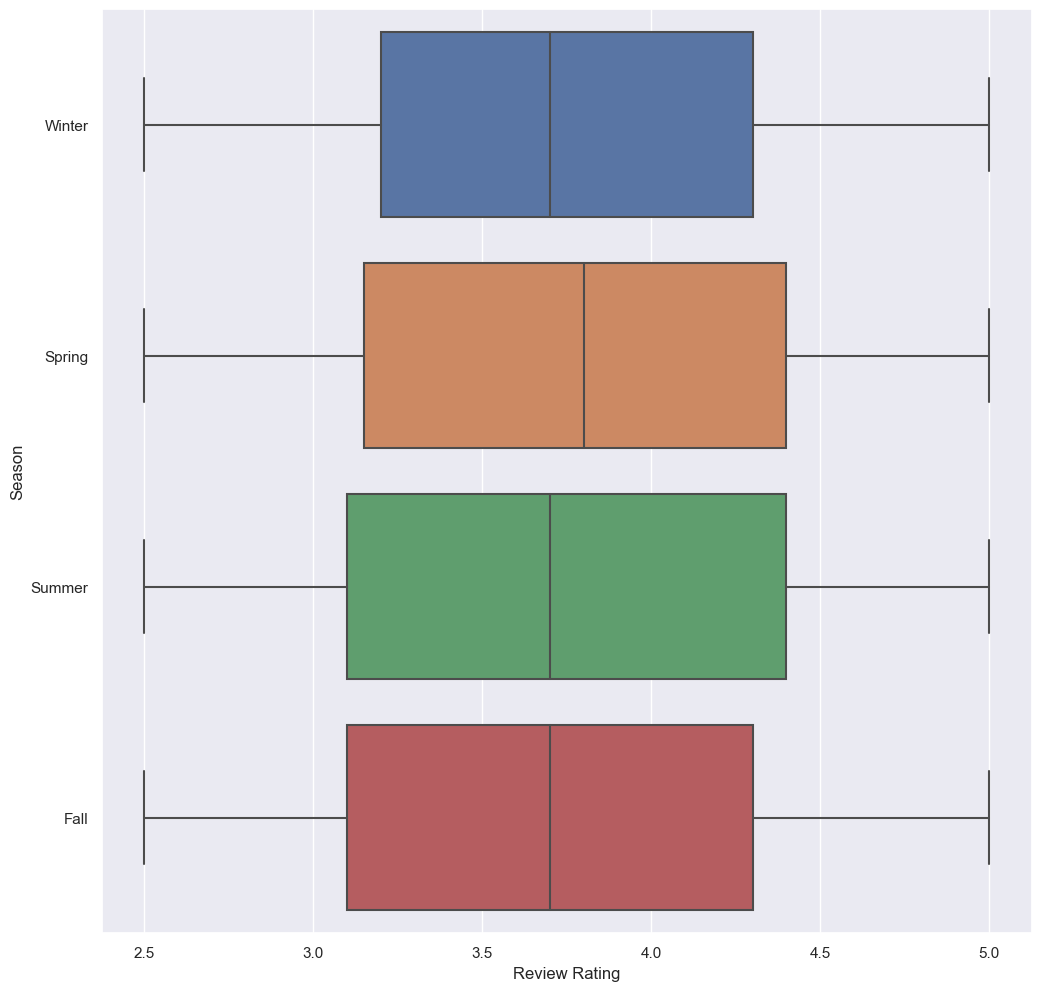

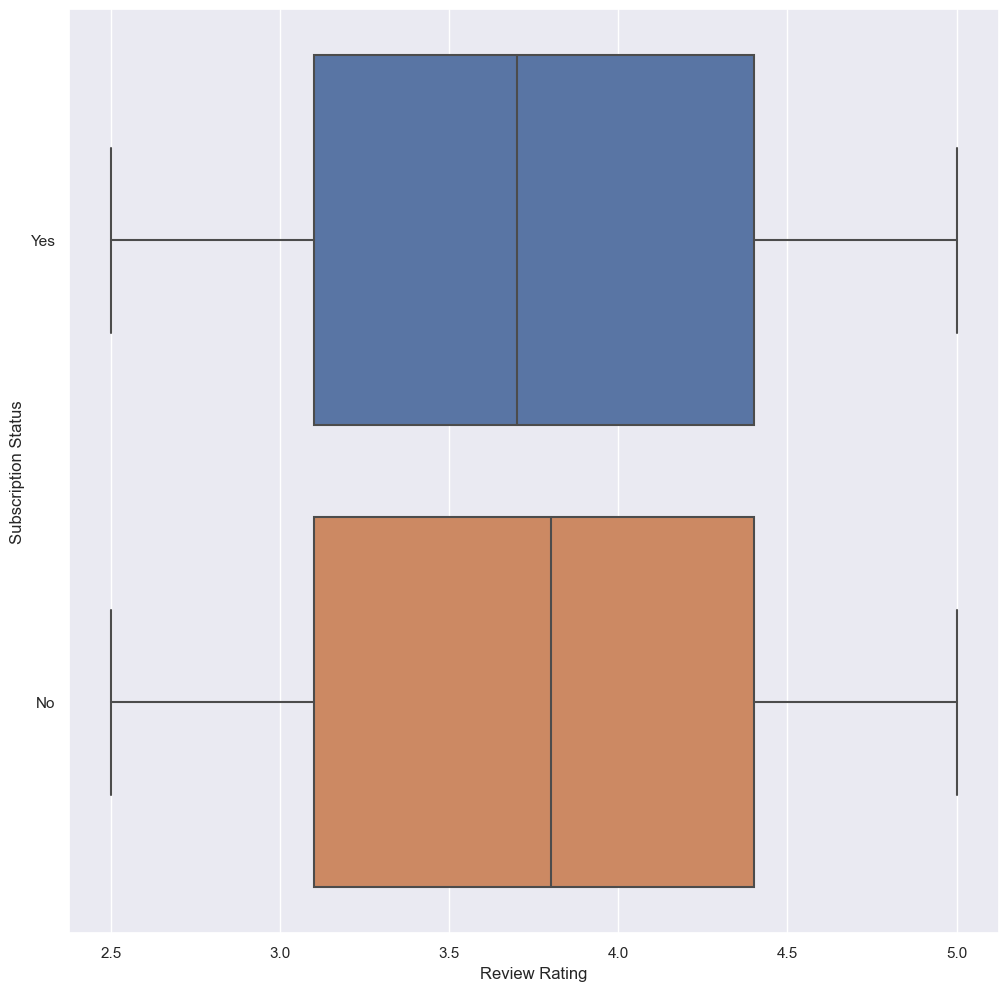

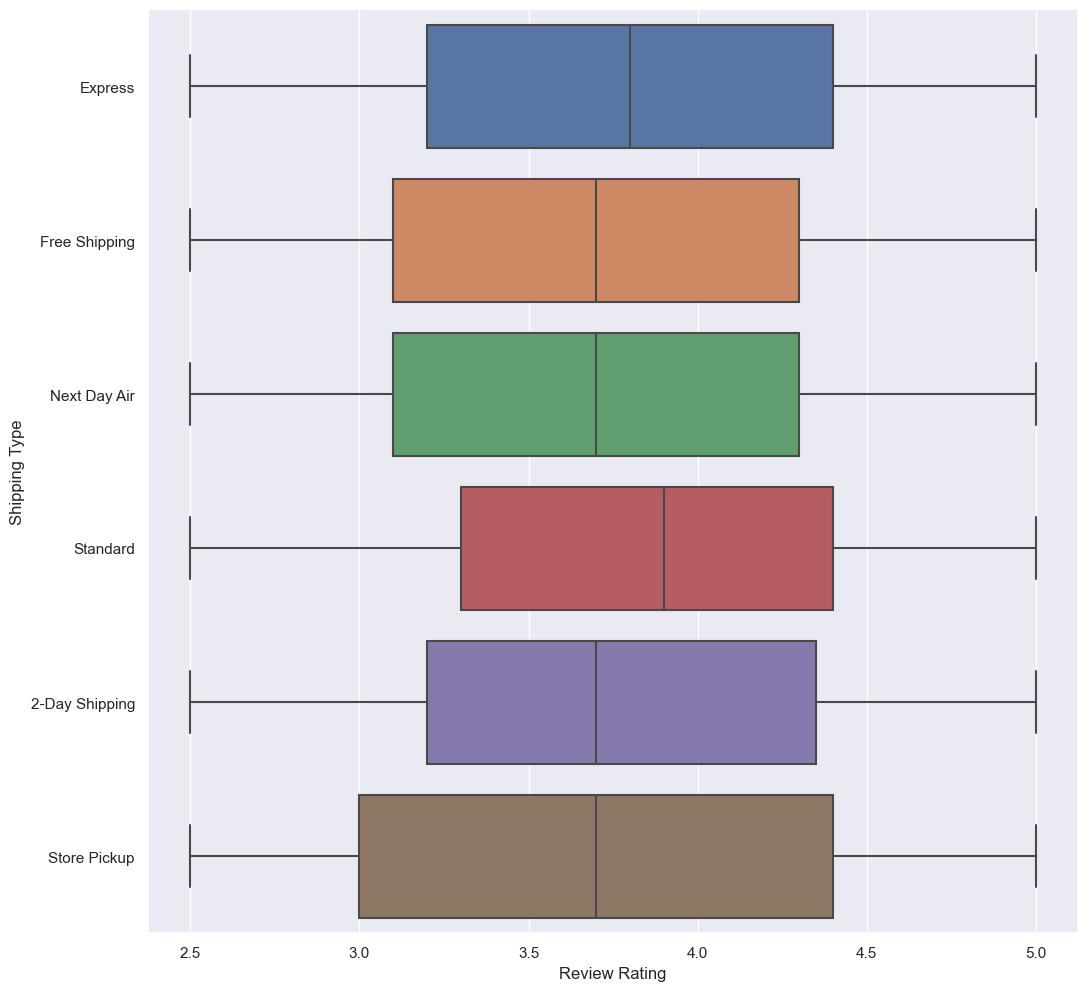

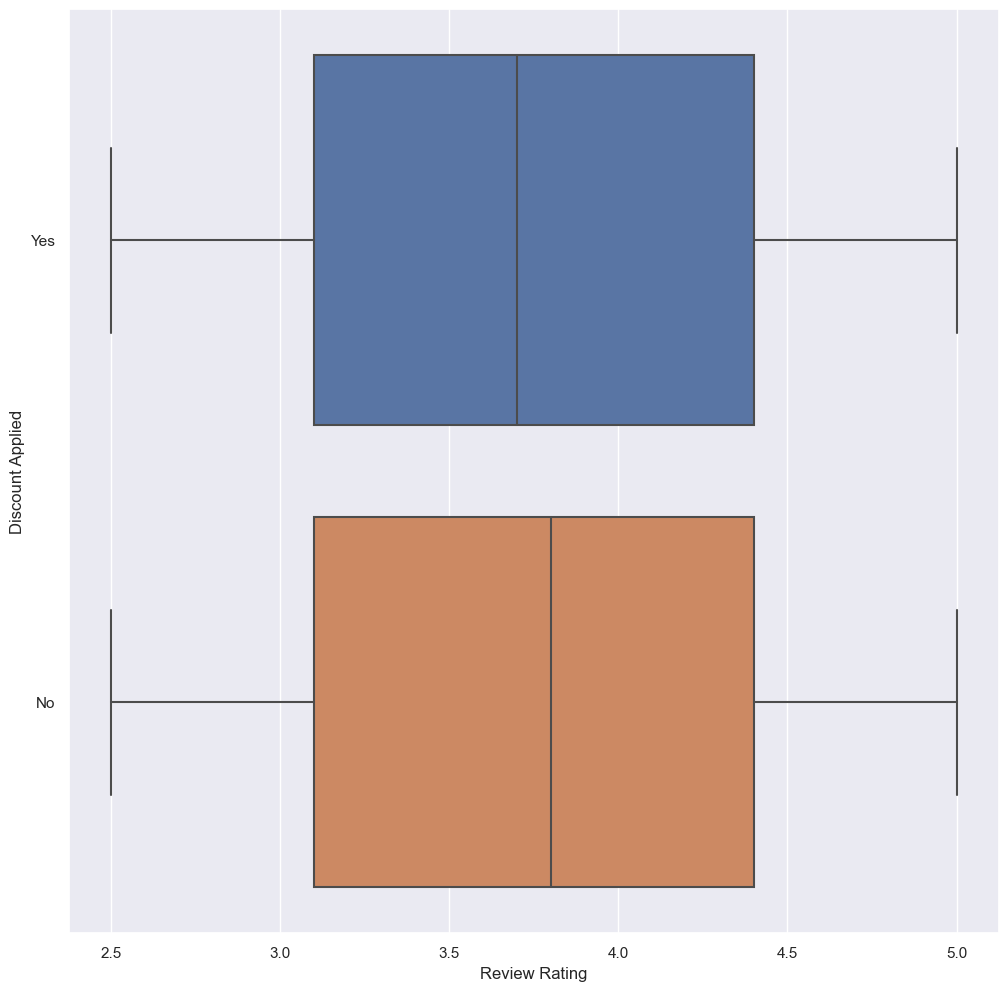

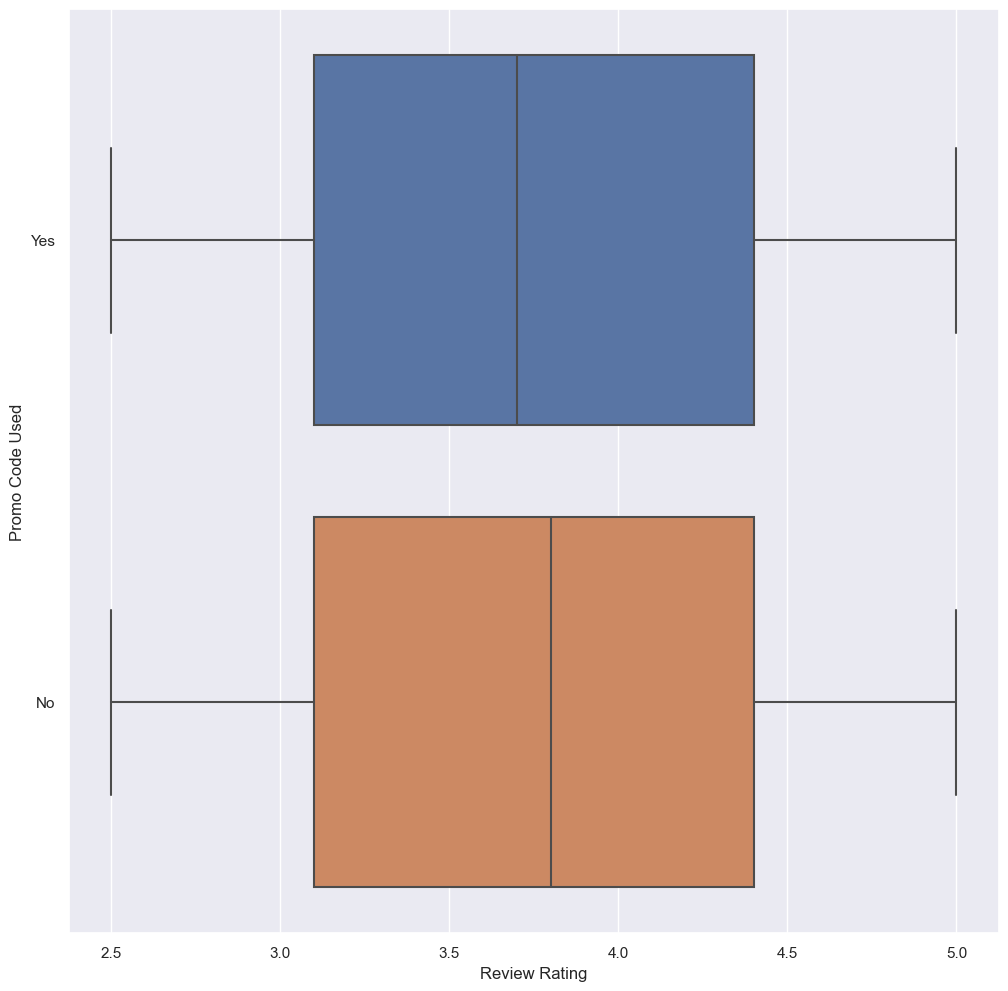

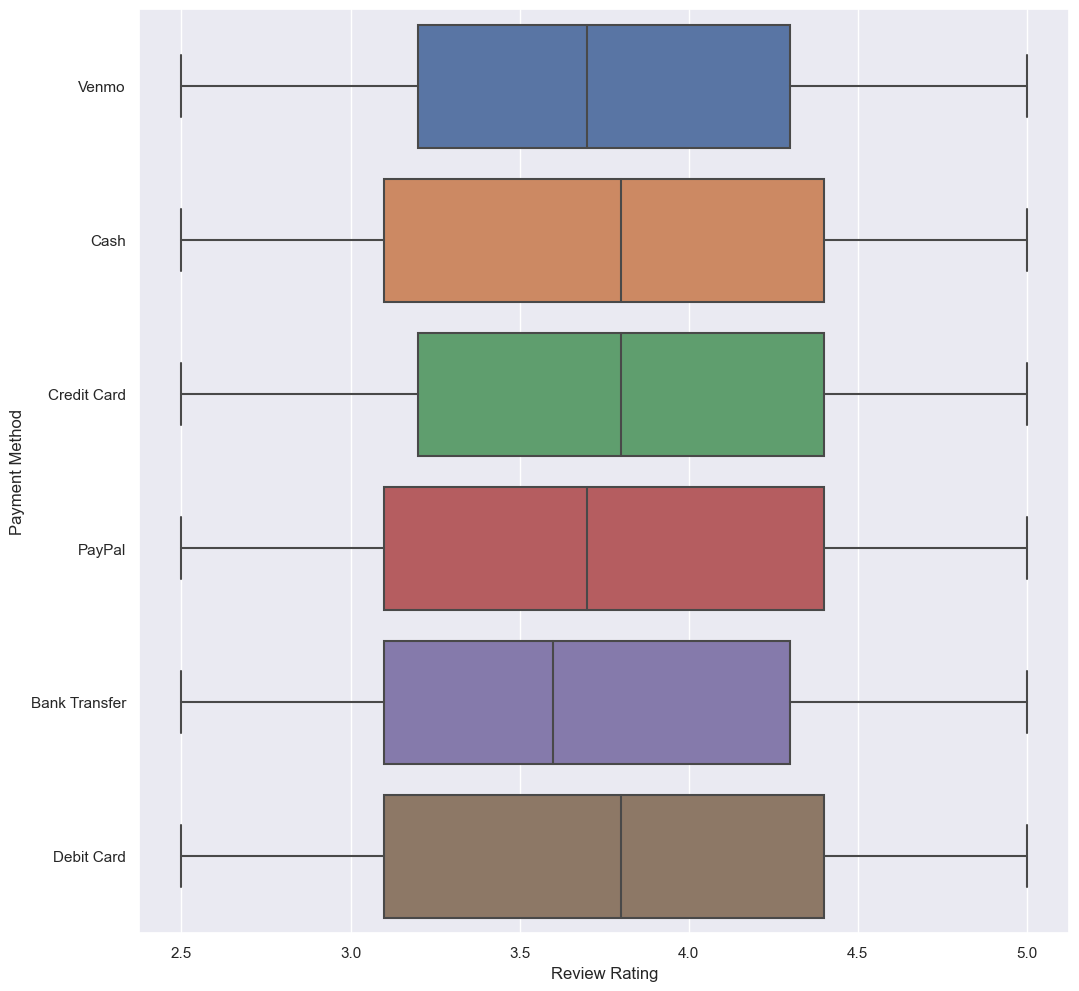

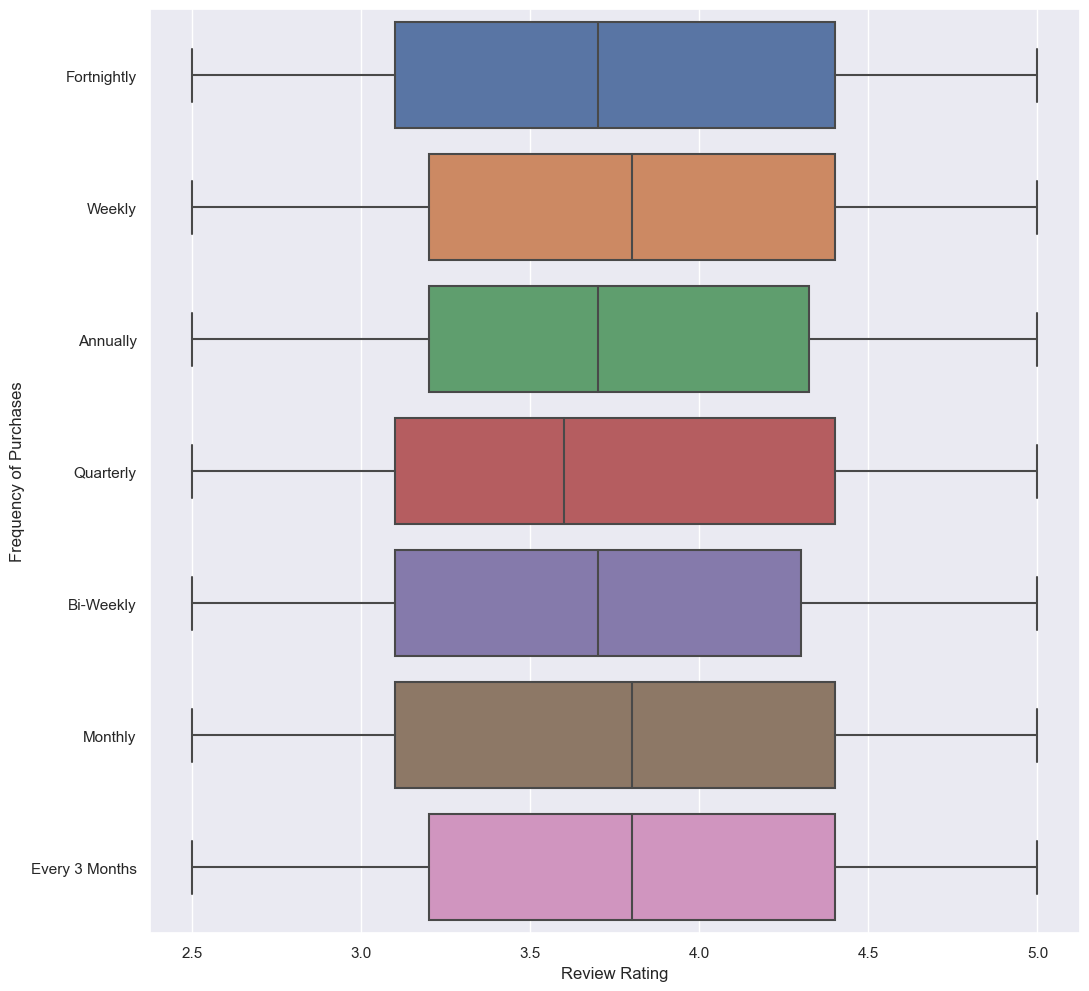

In [48]:
# Find the relationship between review rate and all the categorical variables
for var in data_obj:
  tempdf = data[[var,'Review Rating']]
  f = plt.figure(figsize=(12, 12))
  sb.boxplot(x = "Review Rating", y = var, data = data, orient = "h")